<a href="https://colab.research.google.com/github/hajnayeb/Python_Web_Scraping/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bs4
!pip install beautifulSoup4
!pip install lxml
!pip install requests

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
html_data =requests.get('https://finance.yahoo.com/quote/AMZN/history?period1=1451606400&period2=1612137600&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true')

In [4]:
soup = BeautifulSoup(html_data.text, 'lxml')  #'html.parser'

In [ ]:
print(soup.prettify())

In [6]:
headings1 = soup.find_all('h1')  # finding the level#1 headings
print(headings1)

[<h1 class="D(ib) Fz(18px)" data-reactid="7">Amazon.com, Inc. (AMZN)</h1>]


In [7]:
headings1[0].text # printing the first and the only level#3 heading text

'Amazon.com, Inc. (AMZN)'

In [8]:
headings3 = soup.find_all('h3')  # finding all the the level#3 headings
print(headings3)

[<h3 class="Maw(160px)" data-reactid="15"><a aria-label="S&amp;P Futures has increased by 0.20% or 8.25 points to 4,202.00 points" class="Fz(s) Ell Fw(600) C($linkColor)" data-reactid="16" href="/quote/ES%3DF?p=ES%3DF" title="S&amp;P Futures">S&amp;P Futures</a><br data-reactid="17"/><span class="Trsdu(0.3s) Fz(s) Mt(4px) Mb(0px) Fw(b) D(ib)" data-reactid="18">4,202.00</span><div class="Fz(xs) Fw(b) C($positiveColor)" data-reactid="19"><span class="Trsdu(0.3s) C($positiveColor)" data-reactid="20">+8.25</span><span class="Mstart(2px)" data-reactid="21"><!-- react-text: 22 -->(<!-- /react-text --><span class="Trsdu(0.3s) C($positiveColor)" data-reactid="23">+0.20%</span><!-- react-text: 24 -->)<!-- /react-text --></span></div><a class="Fl(end) Mt(-30px)" data-reactid="25" data-symbol="ES=F" href="/chart/ES%3DF" rel="noopener noreferrer" target="_blank" title="S&amp;P Futures Chart"><canvas data-reactid="26" style="width:70px;height:25px;"></canvas></a></h3>, <h3 class="Maw(160px)" data-r

In [9]:
# printing the level#3 headings
for head3 in headings3: 
  print(head3.text)

S&P Futures4,202.00+8.25(+0.20%)
Dow Futures34,409.00+57.00(+0.17%)
Nasdaq Futures13,668.25+33.00(+0.24%)


In [10]:
# printing the change percentage in the values
for head3 in headings3: 
  cn = head3.text.split()[0]
  pc = head3.text.split()[-1][-7:-2]
  print(f'{cn} stock changed {pc} %')

S&P stock changed +0.20 %
Dow stock changed +0.17 %
Nasdaq stock changed +0.24 %


In [16]:
# reading the file again, and looking for tables:
dfs = pd.read_html('https://finance.yahoo.com/quote/AMZN/history?period1=1451606400&period2=1612137600&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true')
amazon_data=dfs[0]  # selecting the first table
amazon_data.reset_index(inplace=True)
amazon_data.drop(labels=61, axis=0,inplace=True)
amazon_data.tail(3)

,index,Date,Open,High,Low,Close*,Adj Close**,Volume
58,58,"Mar 01, 2016",556.29,603.24,538.58,593.64,593.64,94009500
59,59,"Feb 01, 2016",578.15,581.80,474.00,552.52,552.52,124144800
60,60,"Jan 01, 2016",656.29,657.72,547.18,587.00,587.00,130200900


In [17]:
x=amazon_data.loc[amazon_data['Date'] == 'Jun 01, 2019'] # Finding data on a specific date
print(x)

    index          Date     Open  ...   Close* Adj Close**    Volume
19     19  Jun 01, 2019  1760.01  ...  1893.63     1893.63  74746500

[1 rows x 8 columns]


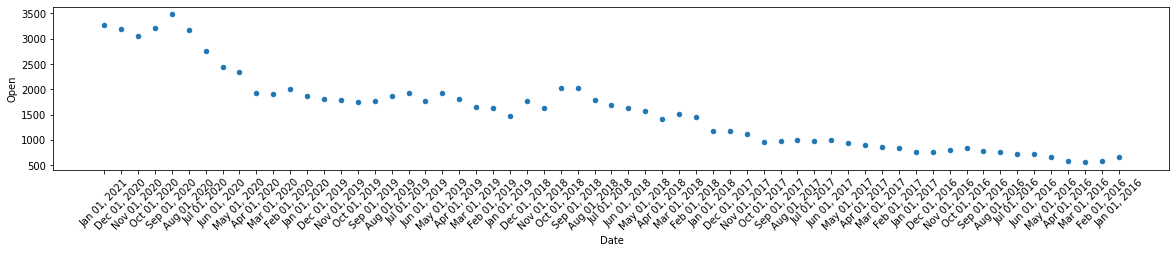

In [18]:
amazon_data.Open=pd.to_numeric(amazon_data.Open)
amazon_data.High=pd.to_numeric(amazon_data.High)
#amazon_data.plot(x="Date", y="Open")
ax = amazon_data.plot(x="Date",y='Open', kind = 'scatter',figsize=(20,3))
ax.tick_params(axis='x', labelrotation = 45)